# Lotka-Volterra

The Lotka-Volterra problem is a common differential equation and relatively easy to solve.

In [1]:
"""Benchmark all solvers on the Lotka-Volterra problem."""

import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax.config import config

from probdiffeq.util.doc_util import notebook

config.update("jax_platform_name", "cpu")

In [2]:
def load_results():
    """Load the results from a file."""
    return jnp.load("./results.npy", allow_pickle=True)[()]


def load_solution():
    """Load the solution-to-be-plotted from a file."""
    ts = jnp.load("./plot_ts.npy")
    ys = jnp.load("./plot_ys.npy")
    return ts, ys


def choose_style(label):
    """Choose a plotting style for a given algorithm."""
    if "ProbDiffEq" in label:
        return {"color": "C0", "linestyle": "solid"}
    if "SciPy" in label:
        return {"color": "C2", "linestyle": "dashed"}
    if "iffrax" in label:
        return {"color": "C3", "linestyle": "dotted"}
    msg = f"Label {label} unknown."
    raise ValueError(msg)


def plot_results(axis, results):
    """Plot the results."""
    axis.set_title("Benchmark")
    for label, wp in results.items():
        style = choose_style(label)

        precision = wp["precision"]
        work_mean, work_std = (wp["work_mean"], wp["work_std"])
        axis.loglog(precision, work_mean, label=label, **style)

        range_lower, range_upper = work_mean - work_std, work_mean + work_std
        axis.fill_between(precision, range_lower, range_upper, alpha=0.3, **style)

    axis.set_xlabel("Precision [relative RMSE]")
    axis.set_ylabel("Work [wall time, s]")
    axis.grid()
    axis.legend(loc="upper center", ncols=3, mode="expand", facecolor="ghostwhite")
    axis.set_ylim((1e-5, 1e1))
    return axis


def plot_solution(axis, ts, ys, yscale="linear"):
    """Plot the IVP solution."""
    axis.set_title("Lotka-Volterra")
    kwargs = {"color": "black", "alpha": 0.85}

    axis.plot(
        ts, ys[:, 0], linestyle="solid", marker="None", label="Predators", **kwargs
    )
    axis.plot(ts, ys[:, 1], linestyle="dashed", marker="None", label="Prey", **kwargs)
    for y in ys.T:
        axis.plot(ts[0], y[0], linestyle="None", marker=".", markersize=4, **kwargs)
        axis.plot(ts[-1], y[-1], linestyle="None", marker=".", markersize=4, **kwargs)

    axis.set_ylim((-1, 27))
    axis.legend(facecolor="ghostwhite", ncols=2, loc="lower center", mode="expand")

    axis.set_xlabel("Time $t$")
    axis.set_ylabel("Solution $y$")
    axis.set_yscale(yscale)
    return axis

In [3]:
plt.rcParams.update(notebook.plot_style())
plt.rcParams.update(notebook.plot_sizes())

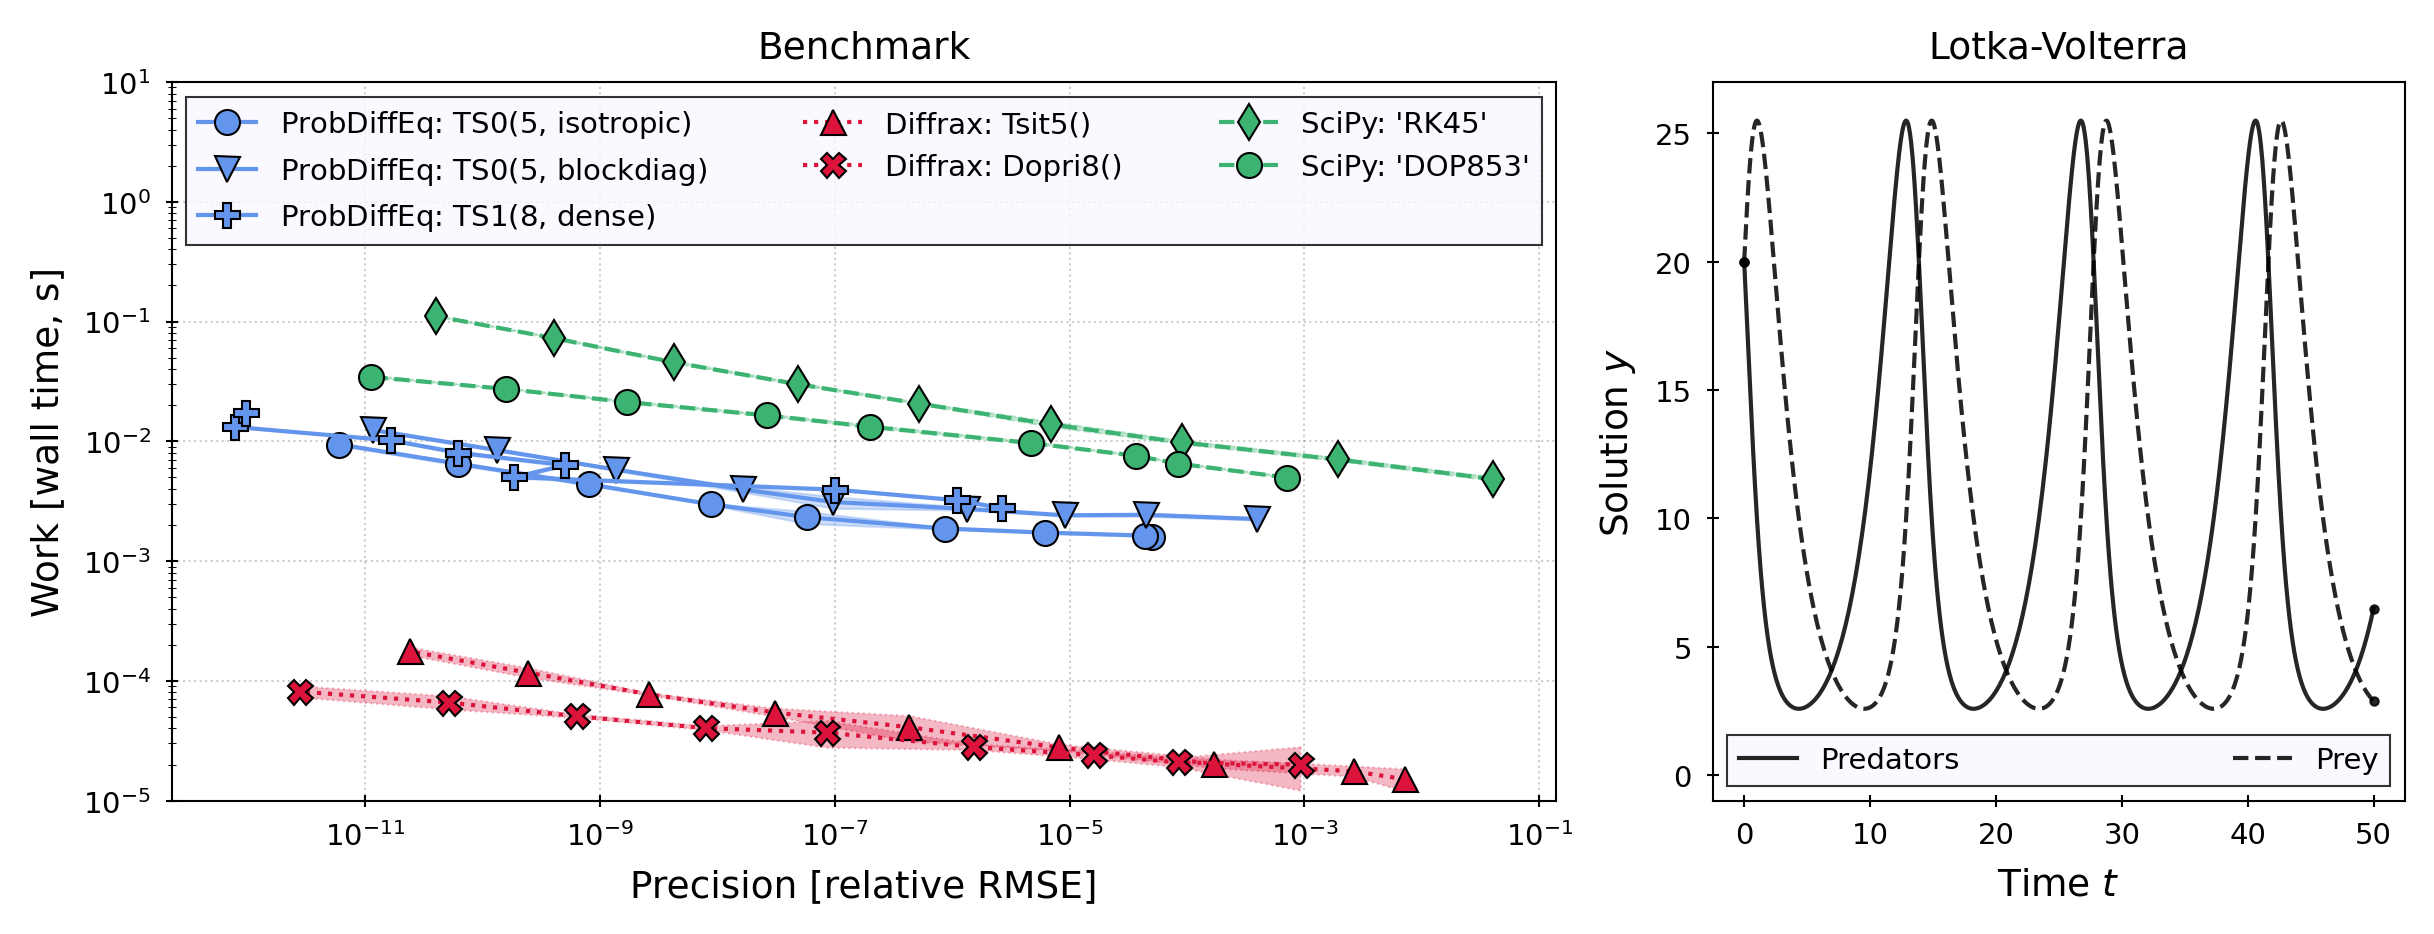

In [4]:
layout = [
    ["benchmark", "benchmark", "solution"],
    ["benchmark", "benchmark", "solution"],
]
fig, axes = plt.subplot_mosaic(layout, figsize=(8, 3), constrained_layout=True, dpi=300)


results = load_results()
ts, ys = load_solution()

_ = plot_results(axes["benchmark"], results)
_ = plot_solution(axes["solution"], ts, ys)

plt.show()